In [81]:
#根据年龄、在家听音乐的频率、读书频率预测是否受过大学教育
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
# 允许为DataFrame使用display()
from IPython.display import display 
from matplotlib import pyplot as plt

# 为notebook提供更加漂亮的可视化
%matplotlib inline


# 导入数据
data = pd.read_excel("E:\\桌面\\双体船数据.xlsx")
data

,ListingPrice,Length,Beam,Draftft,SailArea,GDP,Year
0,666903,0.448649,0.512287,0.3450,0.402029,0.220288,0.000000
1,484664,0.448649,0.512287,0.3450,0.402029,0.014817,0.142857
2,245000,0.000000,0.023629,0.2075,0.040577,0.000337,0.357143
3,523822,0.405405,0.472590,0.5000,0.402029,0.014817,0.142857
4,230000,0.351351,0.464083,0.3325,0.350774,0.000052,1.000000
...,...,...,...,...,...,...,...
1049,460769,0.270270,0.534972,0.2900,0.195408,0.360947,0.214286
1050,315575,0.081081,0.310964,0.2700,0.143620,0.518185,0.214286
1051,383017,0.448649,0.512287,0.3450,0.402029,0.053984,0.428571
1052,485879,0.270270,0.534972,0.2900,0.195408,0.053984,0.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ListingPrice  1054 non-null   int64  
 1   Length        1054 non-null   float64
 2   Beam          1054 non-null   float64
 3   Draftft       1054 non-null   float64
 4   SailArea      1054 non-null   float64
 5   GDP           1054 non-null   float64
 6   Year          1054 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 57.7 KB


In [83]:
data.describe()

,ListingPrice,Length,Beam,Draftft,SailArea,GDP,Year
count,1.054000e+03,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,4.342048e+05,0.313231,0.428738,0.327491,0.283240,0.160062,0.404784
std,1.841201e+05,0.198808,0.145086,0.098638,0.146101,0.224524,0.296550
min,9.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.192500e+05,0.108108,0.310964,0.270000,0.161773,0.014817,0.142857
50%,4.150000e+05,0.297297,0.472590,0.332500,0.241858,0.053984,0.357143
75%,5.158440e+05,0.448649,0.527410,0.345000,0.402029,0.258885,0.642857
max,2.890000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


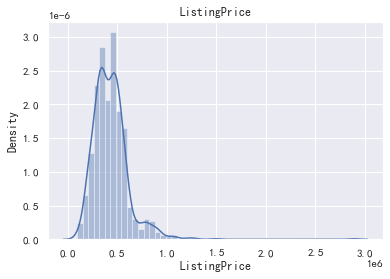

In [84]:
import seaborn as sns
import warnings
#设置为seaborn风格
sns.set()
#不显示警告
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#绘制分布图
sns.distplot(data['ListingPrice'], norm_hist=False, kde=True)
plt.title('ListingPrice')
plt.show()

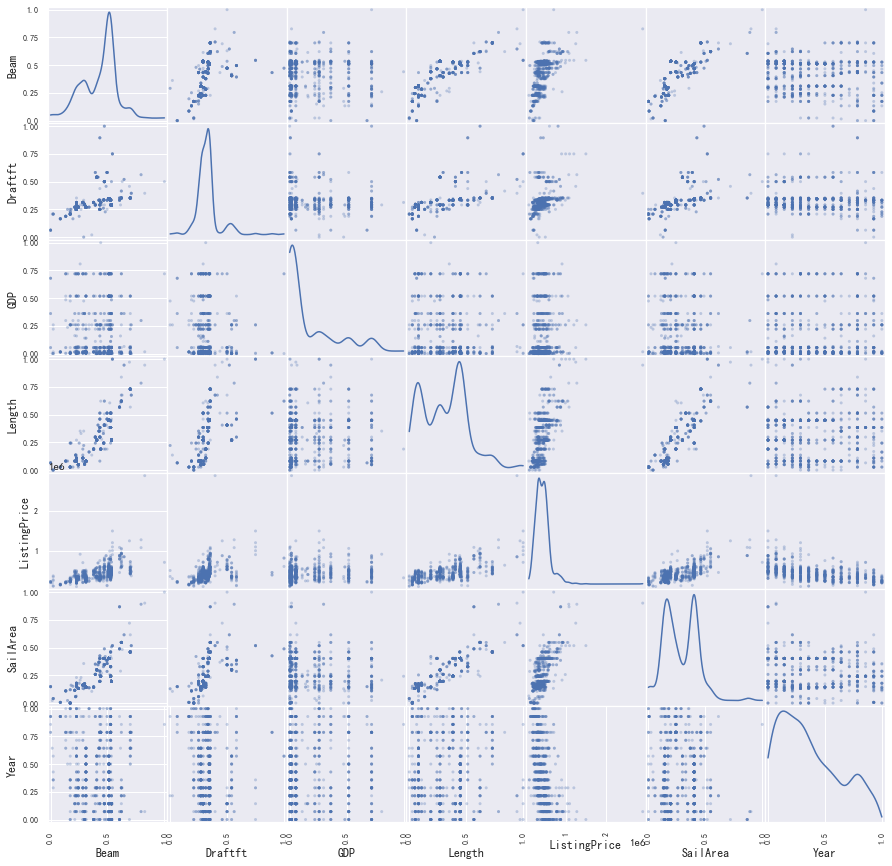

In [85]:
#查看特征的分布和相关性
#对角线就是特征的分布
#第i行j列表示第i个特征和第j个特征的散点图
pd.plotting.scatter_matrix(data[data.columns.difference(['label'])], alpha = 0.3, figsize = (15,15), diagonal = 'kde');

In [86]:
# 查看特征的分布情况
for col in ['Length','Beam','Draftft','SailArea','GDP','Year']:
    display(pd.value_counts(data[col]))
    print("========")

0.448649    235
0.081081    153
0.270270    117
0.383784     73
0.189189     50
0.027027     37
0.513514     35
0.108108     35
0.729730     33
0.048649     31
0.243243     31
0.297297     31
0.405405     29
0.621622     25
0.054054     21
0.351351     17
0.459459     16
0.567568     13
0.135135     12
0.443243     10
0.675676      7
0.000000      7
0.064865      7
1.000000      6
0.329730      4
0.945946      4
0.162162      4
0.605405      2
0.783784      2
0.221622      2
0.505405      1
0.167568      1
0.837838      1
0.972973      1
0.278378      1
Name: Length, dtype: int64

0.512287    236
0.527410     90
0.310964     88
0.534972     88
0.227788     50
0.432892     46
0.700378     34
0.243856     33
0.405482     31
0.283554     28
0.172968     28
0.472590     27
0.440454     25
0.621928     24
0.298677     21
0.378072     20
0.466919     19
0.496219     18
0.393195     18
0.212665     13
0.605860     12
0.425331     11
0.133270     11
0.086011      9
0.220227      8
0.000000      7
0.023629      6
0.338374      5
0.543478      5
0.464083      4
0.708885      4
0.416824      4
0.291115      3
0.645558      3
0.480151      2
0.487713      2
0.794896      2
0.149338      2
0.180529      2
0.196597      2
0.251418      2
0.827032      1
0.259924      1
0.015123      1
0.519849      1
0.692817      1
0.629490      1
0.267486      1
1.000000      1
0.362004      1
0.448960      1
0.614367      1
Name: Beam, dtype: int64

0.3450    236
0.2900    150
0.2700    139
0.3325     96
0.3125     85
0.3525     61
0.2500     59
0.5400     35
0.2075     29
0.5000     27
0.2950     21
0.3350     19
0.5825     15
0.1875     13
0.1650     11
0.3375     10
0.0625      7
0.2275      6
0.7500      5
0.3950      5
0.8950      4
1.0000      3
0.4150      3
0.4575      3
0.5200      3
0.2600      3
0.0000      2
0.5625      2
0.4375      1
0.0200      1
Name: Draftft, dtype: int64

0.402029    281
0.143620    108
0.195408    101
0.241858     61
0.172451     43
0.460224     43
0.131874     33
0.298986     31
0.161773     26
0.241324     25
0.546183     24
0.000000     24
0.327816     21
0.344901     16
0.178324     16
0.258409     14
0.114789     13
0.149493     12
0.367859     12
0.109450     11
0.488521     10
0.005873      9
0.517352      9
0.057662      8
0.356113      8
0.385478      8
0.147891      7
0.287240      7
0.040577      6
0.350774      5
0.867592      5
0.253070      5
0.137747      5
0.120128      4
0.615056      4
0.425521      4
0.022958      3
0.285104      3
0.419648      3
0.230112      2
0.506140      2
0.132408      2
0.384944      2
0.128671      2
0.160705      2
0.151628      2
0.890550      2
0.482648      1
0.270155      1
0.105179      1
1.000000      1
0.063534      1
0.720235      1
0.900694      1
0.206620      1
0.256807      1
0.287774      1
Name: SailArea, dtype: int64

0.014817    243
0.053984    200
0.005725     89
0.518185     78
0.719200     77
0.258885     68
0.360947     50
0.000155     42
0.220288     37
0.004637     19
0.000777     18
0.000052     13
0.297741     13
0.064087     11
0.021397      9
0.000337      8
0.000000      6
0.000674      5
0.001269      5
0.004222      5
0.109937      5
0.030929      5
0.158895      4
0.004171      4
0.021785      4
0.017148      4
0.026526      3
0.679049      3
0.484250      3
0.139208      3
0.000104      2
0.473889      2
0.016190      2
0.006191      2
0.153974      2
0.236090      2
0.035074      1
0.000907      1
1.000000      1
0.006217      1
0.004093      1
0.808051      1
0.000285      1
0.161745      1
Name: GDP, dtype: int64

0.142857    116
0.285714    108
0.785714    101
0.000000     97
0.071429     97
0.357143     81
0.214286     81
0.500000     64
0.428571     64
0.928571     62
0.571429     58
0.642857     53
1.000000     28
0.714286     23
0.857143     21
Name: Year, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

# X为自变量
X = data.drop('ListingPrice',axis = 1)#除去自变量的所有列
# y为因变量
y = data['ListingPrice']


# 数据集划分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)

#处理缺失值
X_train.dropna(how="all",inplace=True)
y_train.dropna(how="all",inplace=True)
print(X_train.shape,y_train.shape)


(843, 6) (843,)
(843, 6) (843,)


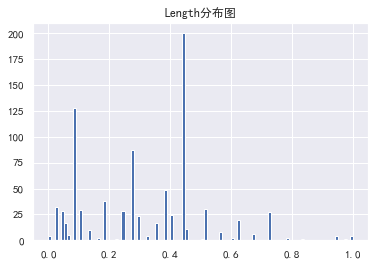

In [92]:
#绘制分布图
plt.hist(X_train['Length'],bins=100);
plt.title('Length分布图')
plt.show()

In [93]:
#归一化特征
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [94]:
#构建模型
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
            'max_depth': [2, 3, 4, 5, 6, 7, 8],
            'n_estimators': [30, 50, 100, 300, 500, 1000,2000],
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.01, 0.02, 0.03, 0.05, 0.5],
            "gamma":[0.0, 0.1, 0.2, 0.3, 0.4],
            "reg_alpha":[0.0001,0.001, 0.01, 0.1, 1, 100],
            "reg_lambda":[0.0001,0.001, 0.01, 0.1, 1, 100],
            "min_child_weight": [2,3,4,5,6,7,8],
            "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
            "subsample":[0.6, 0.7, 0.8, 0.9]}



In [95]:
#xgboost回归模型

# GridSearchCV对象，用于搜索最佳超参数
#3.随机搜索并打印最佳参数
gsearch1 = RandomizedSearchCV(XGBRegressor(scoring='ls',seed=27), param_grid, cv=5)
gsearch1.fit(X_train, y_train)

print("best_score_:",gsearch1.best_score_)
print("gsearch1.best_params_:",gsearch1.best_params_)
#4.用最佳参数进行预测
y_test_pre= gsearch1.predict(X_test)
 
 
#5.打印测试集RMSE
rmse = sqrt(mean_squared_error(np.array(list(y_test)), np.array(list(y_test_pre))))
print("rmse:",rmse)


[17:22:32] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:22:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:22:33] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then b